In [7]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

### 1. The .plot() Method

In [13]:
bb = data.DataReader(name="AAPL", data_source="yahoo", start="2012-05-25", end="2017-01-06")
bb.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-05-25,80.835716,79.781425,80.655716,80.327141,82126800.0,53.562382
2012-05-29,82.000000,80.758568,81.557144,81.752853,95127200.0,54.513062
2012-05-30,82.855713,80.937141,81.314285,82.738571,132357400.0,55.170326


In [18]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1162 entries, 2012-05-25 to 2017-01-06
Data columns (total 6 columns):
High         1162 non-null float64
Low          1162 non-null float64
Open         1162 non-null float64
Close        1162 non-null float64
Volume       1162 non-null float64
Adj Close    1162 non-null float64
dtypes: float64(6)
memory usage: 63.5 KB


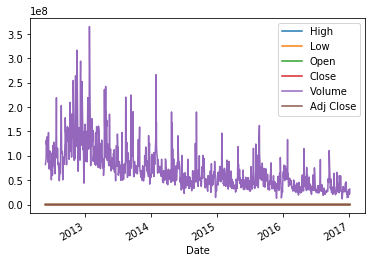

In [14]:
bb.plot()

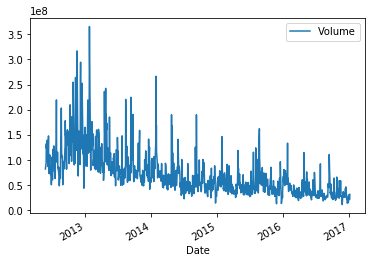

In [16]:
bb.plot(y='Volume')

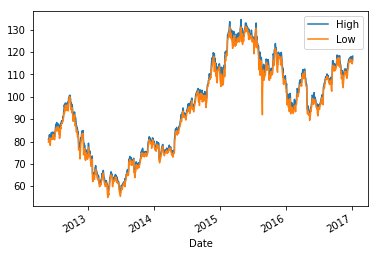

In [17]:
bb.plot(y=['High', 'Low'])

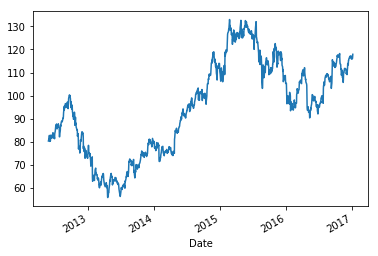

In [20]:
bb['Close'].plot()

### 2. Modifying Aesthetics

In [22]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

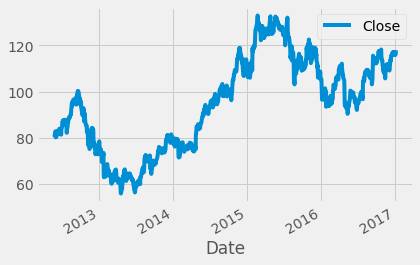

In [25]:
plt.style.use('fivethirtyeight')
bb.plot(y = 'Close')

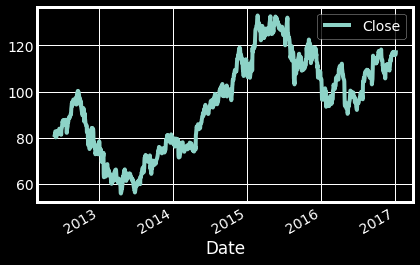

In [26]:
plt.style.use('dark_background')
bb.plot(y = 'Close')

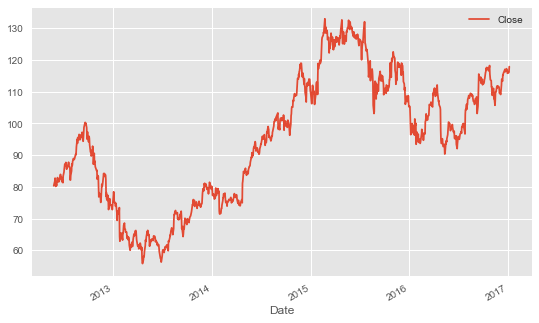

In [29]:
plt.style.use('ggplot')
bb.plot(y = 'Close')

### 3. Bar Charts

In [50]:
def rank_performance(stock_price):
    if stock_price <= 81:
        return "Poor"
    elif stock_price > 81 and stock_price <= 90:
        return "Satisfactory"
    else:
        return "Stellar"
    
bb['Close'].head(10)

Date
2012-05-25    80.327141
2012-05-29    81.752853
2012-05-30    82.738571
2012-05-31    82.532860
2012-06-01    80.141426
2012-06-04    80.612854
2012-06-05    80.404289
2012-06-06    81.637146
2012-06-07    81.674286
2012-06-08    82.902855
Name: Close, dtype: float64

In [51]:
bb['Close'].apply(rank_performance).value_counts()

Stellar         704
Poor            359
Satisfactory     99
Name: Close, dtype: int64

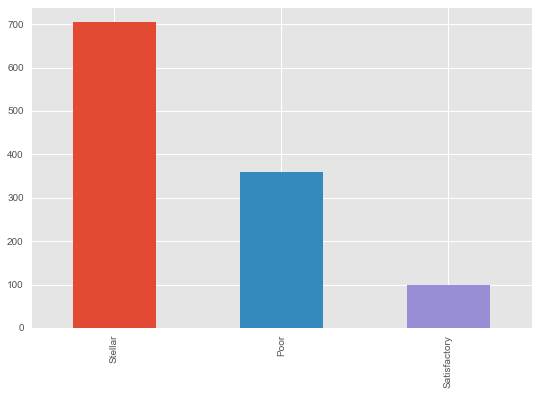

In [55]:
bb['Close'].apply(rank_performance).value_counts().plot(kind='bar')

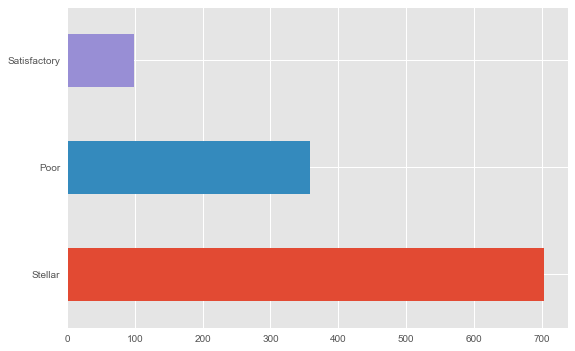

In [56]:
bb['Close'].apply(rank_performance).value_counts().plot(kind='barh')

### 4. Pie Charts

In [57]:
bb['Close'].mean()

94.90171743054809

In [58]:
overall_average = bb['Close'].mean()

def rank_performance(stock_price):
    if stock_price >= overall_average:
        return "Above Average"
    else:
        return "Below Average"
        

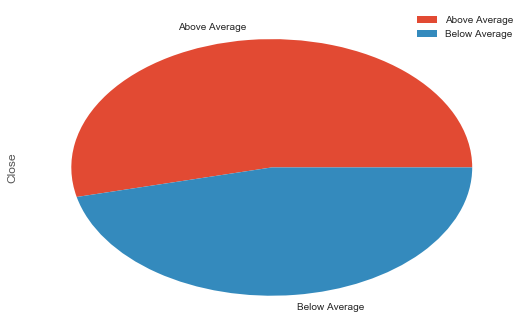

In [61]:
bb['Close'].apply(rank_performance).value_counts().plot(kind='pie', legend='true')

### 5. Histograms

In [72]:
def custom_round(stock_price):
    return int(stock_price / 10.0) * 10

bb['High'].apply(custom_round).value_counts().sort_index()

50      13
60     141
70     180
80     118
90     194
100    158
110    225
120    104
130     29
Name: High, dtype: int64

In [73]:
# total of buckets
bb['High'].apply(custom_round).value_counts().nunique()

9

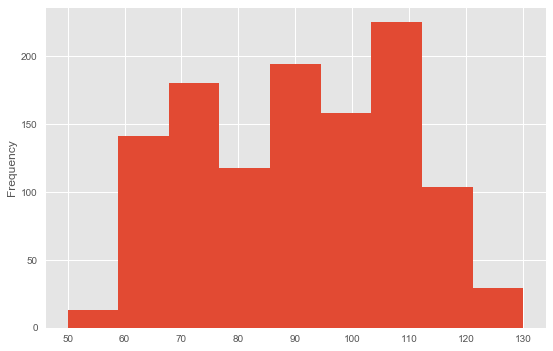

In [75]:
bb['High'].apply(custom_round).plot(kind='hist', bins = 9)